In [1]:
import sys
sys.path.append('../../../../impacts_tools/src')

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from impacts_tools import p3

%matplotlib inline

## P-3 Met-Nav Data

Load the 1 Hz P-3 meteorological & navigation IWG format data.

In [2]:
fname_p3 = (
    '/home/disk/bob/impacts/microphysics/20220217/'
    'IMPACTS-MetNav_P3B_20220217_RA.ict'
)
p3nav = p3.P3(fname_p3, '2022-02-17')
p3nav.data

<xarray.Dataset>
Dimensions:      (time: 29815)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-17T16:33:21 ... 2022-02-18T00:...
Data variables: (12/35)
    lon          (time) float64 -75.45 -75.45 -75.45 ... -75.47 -75.47 -75.47
    lat          (time) float64 37.95 37.95 37.95 37.95 ... 37.93 37.93 37.93
    alt_gps      (time) float64 -26.9 -27.0 -27.0 -27.0 ... -22.7 -22.7 -22.7
    alt_pres     (time) float64 -240.0 -245.0 -247.0 -243.0 ... 70.0 71.0 71.0
    alt_radar    (time) float64 1.7 1.7 0.8 2.6 1.2 1.7 ... 4.1 4.0 3.7 4.0 3.7
    grnd_spd     (time) float64 0.03 0.53 1.6 3.56 5.92 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    svp_ice      (time) float64 22.65 22.36 22.15 21.78 ... 13.51 13.51 13.51
    rh           (time) float64 49.97 52.1 53.56 52.15 ... 77.49 77.06 77.27
    zenith       (time) float64 50.8 50.8 50.8 50.8 ... 115.5 115.5 115.5 115.5
    sun_elev_P3  (time) float64 39.4 39.4 39.4 39.5 ... -24.4 -24.4 -24.4 -24.4
    sun_az       (time) float64 166.2 166.2 166.2 166.2 ... -85.0 -85.0 -85.0
    sun_az_P3    (time) float64 -47.0 -47.3 -47.0 -46.9 ... 61.4 61.4 61.4 61.4
Attributes: (12/27)
    Experiment:           IMPACTS
    Platform:             Wallops P-3 N426NA
    Mission PI:           Lynn McMurdie (lynnm@uw.edu)
    PI_CONTACT_INFO:      Melissa Yang Martin, m.yang@baeri.org
    LOCATION:             Included in data records
    ASSOCIATED_DATA:      This flight represents IMPACTS Science Flight #9 ou...
    ...                   ...
    PROJECT_INFO:         See IMPACTS site on ESPO website.
    STIPULATIONS_ON_USE:  Please contact PI or DM with questions.
    OTHER_COMMENTS:        Potential temperature derived from static air temp...
    REVISION:             RA
    RA:                   Preliminary field data with minimal QC. Limits of d...
    INSTRUMENT_INFO_9:    ime_Start,Day_Of_Year,Latitude,Longitude,GPS_Altitu...

Average the data in 5-s intervals.

In [3]:
date = '2022-02-17'
p3nav_avg = p3.P3(
    fname_p3, date, start_time=f'{date}T16:35:00', end_time='2022-02-18T00:50:00',
    tres='5S'
)
p3nav_avg.data

<xarray.Dataset>
Dimensions:      (time: 5940)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00:...
Data variables: (12/35)
    lon          (time) float64 -75.51 -75.51 -75.52 ... -75.47 -75.47 -75.47
    lat          (time) float64 37.92 37.92 37.92 37.92 ... 37.93 37.93 37.93
    alt_gps      (time) float64 402.3 427.1 456.9 483.1 ... -22.72 -22.7 -22.7
    alt_pres     (time) float64 1.101e+03 1.177e+03 1.277e+03 ... 69.6 69.8 68.8
    alt_radar    (time) float64 1.367e+03 1.467e+03 1.517e+03 ... 3.68 3.8 3.86
    grnd_spd     (time) float64 87.08 89.56 91.4 93.6 ... 0.002 0.002 0.002 0.0
    ...           ...
    svp_ice      (time) float64 18.43 18.36 18.35 18.23 ... 13.52 13.5 13.51
    rh           (time) float64 58.11 57.34 55.84 55.29 ... 77.69 77.67 77.65
    zenith       (time) float64 50.7 50.7 50.7 50.7 ... 115.4 115.4 115.4 115.5
    sun_elev_P3  (time) float64 37.78 38.6 38.86 38.92 ... -24.3 -24.3 -24.36
    sun_az       (time) float64 166.7 166.7 166.7 166.7 ... -85.1 -85.1 -85.1
    sun_az_P3    (time) float64 -89.44 -89.92 -90.22 -90.44 ... 61.4 61.4 61.4
Attributes: (12/27)
    Experiment:           IMPACTS
    Platform:             Wallops P-3 N426NA
    Mission PI:           Lynn McMurdie (lynnm@uw.edu)
    PI_CONTACT_INFO:      Melissa Yang Martin, m.yang@baeri.org
    LOCATION:             Included in data records
    ASSOCIATED_DATA:      This flight represents IMPACTS Science Flight #9 ou...
    ...                   ...
    PROJECT_INFO:         See IMPACTS site on ESPO website.
    STIPULATIONS_ON_USE:  Please contact PI or DM with questions.
    OTHER_COMMENTS:        Potential temperature derived from static air temp...
    REVISION:             RA
    RA:                   Preliminary field data with minimal QC. Limits of d...
    INSTRUMENT_INFO_9:    ime_Start,Day_Of_Year,Latitude,Longitude,GPS_Altitu...

Compare the 1 Hz and 5-s averaged data for all vars.

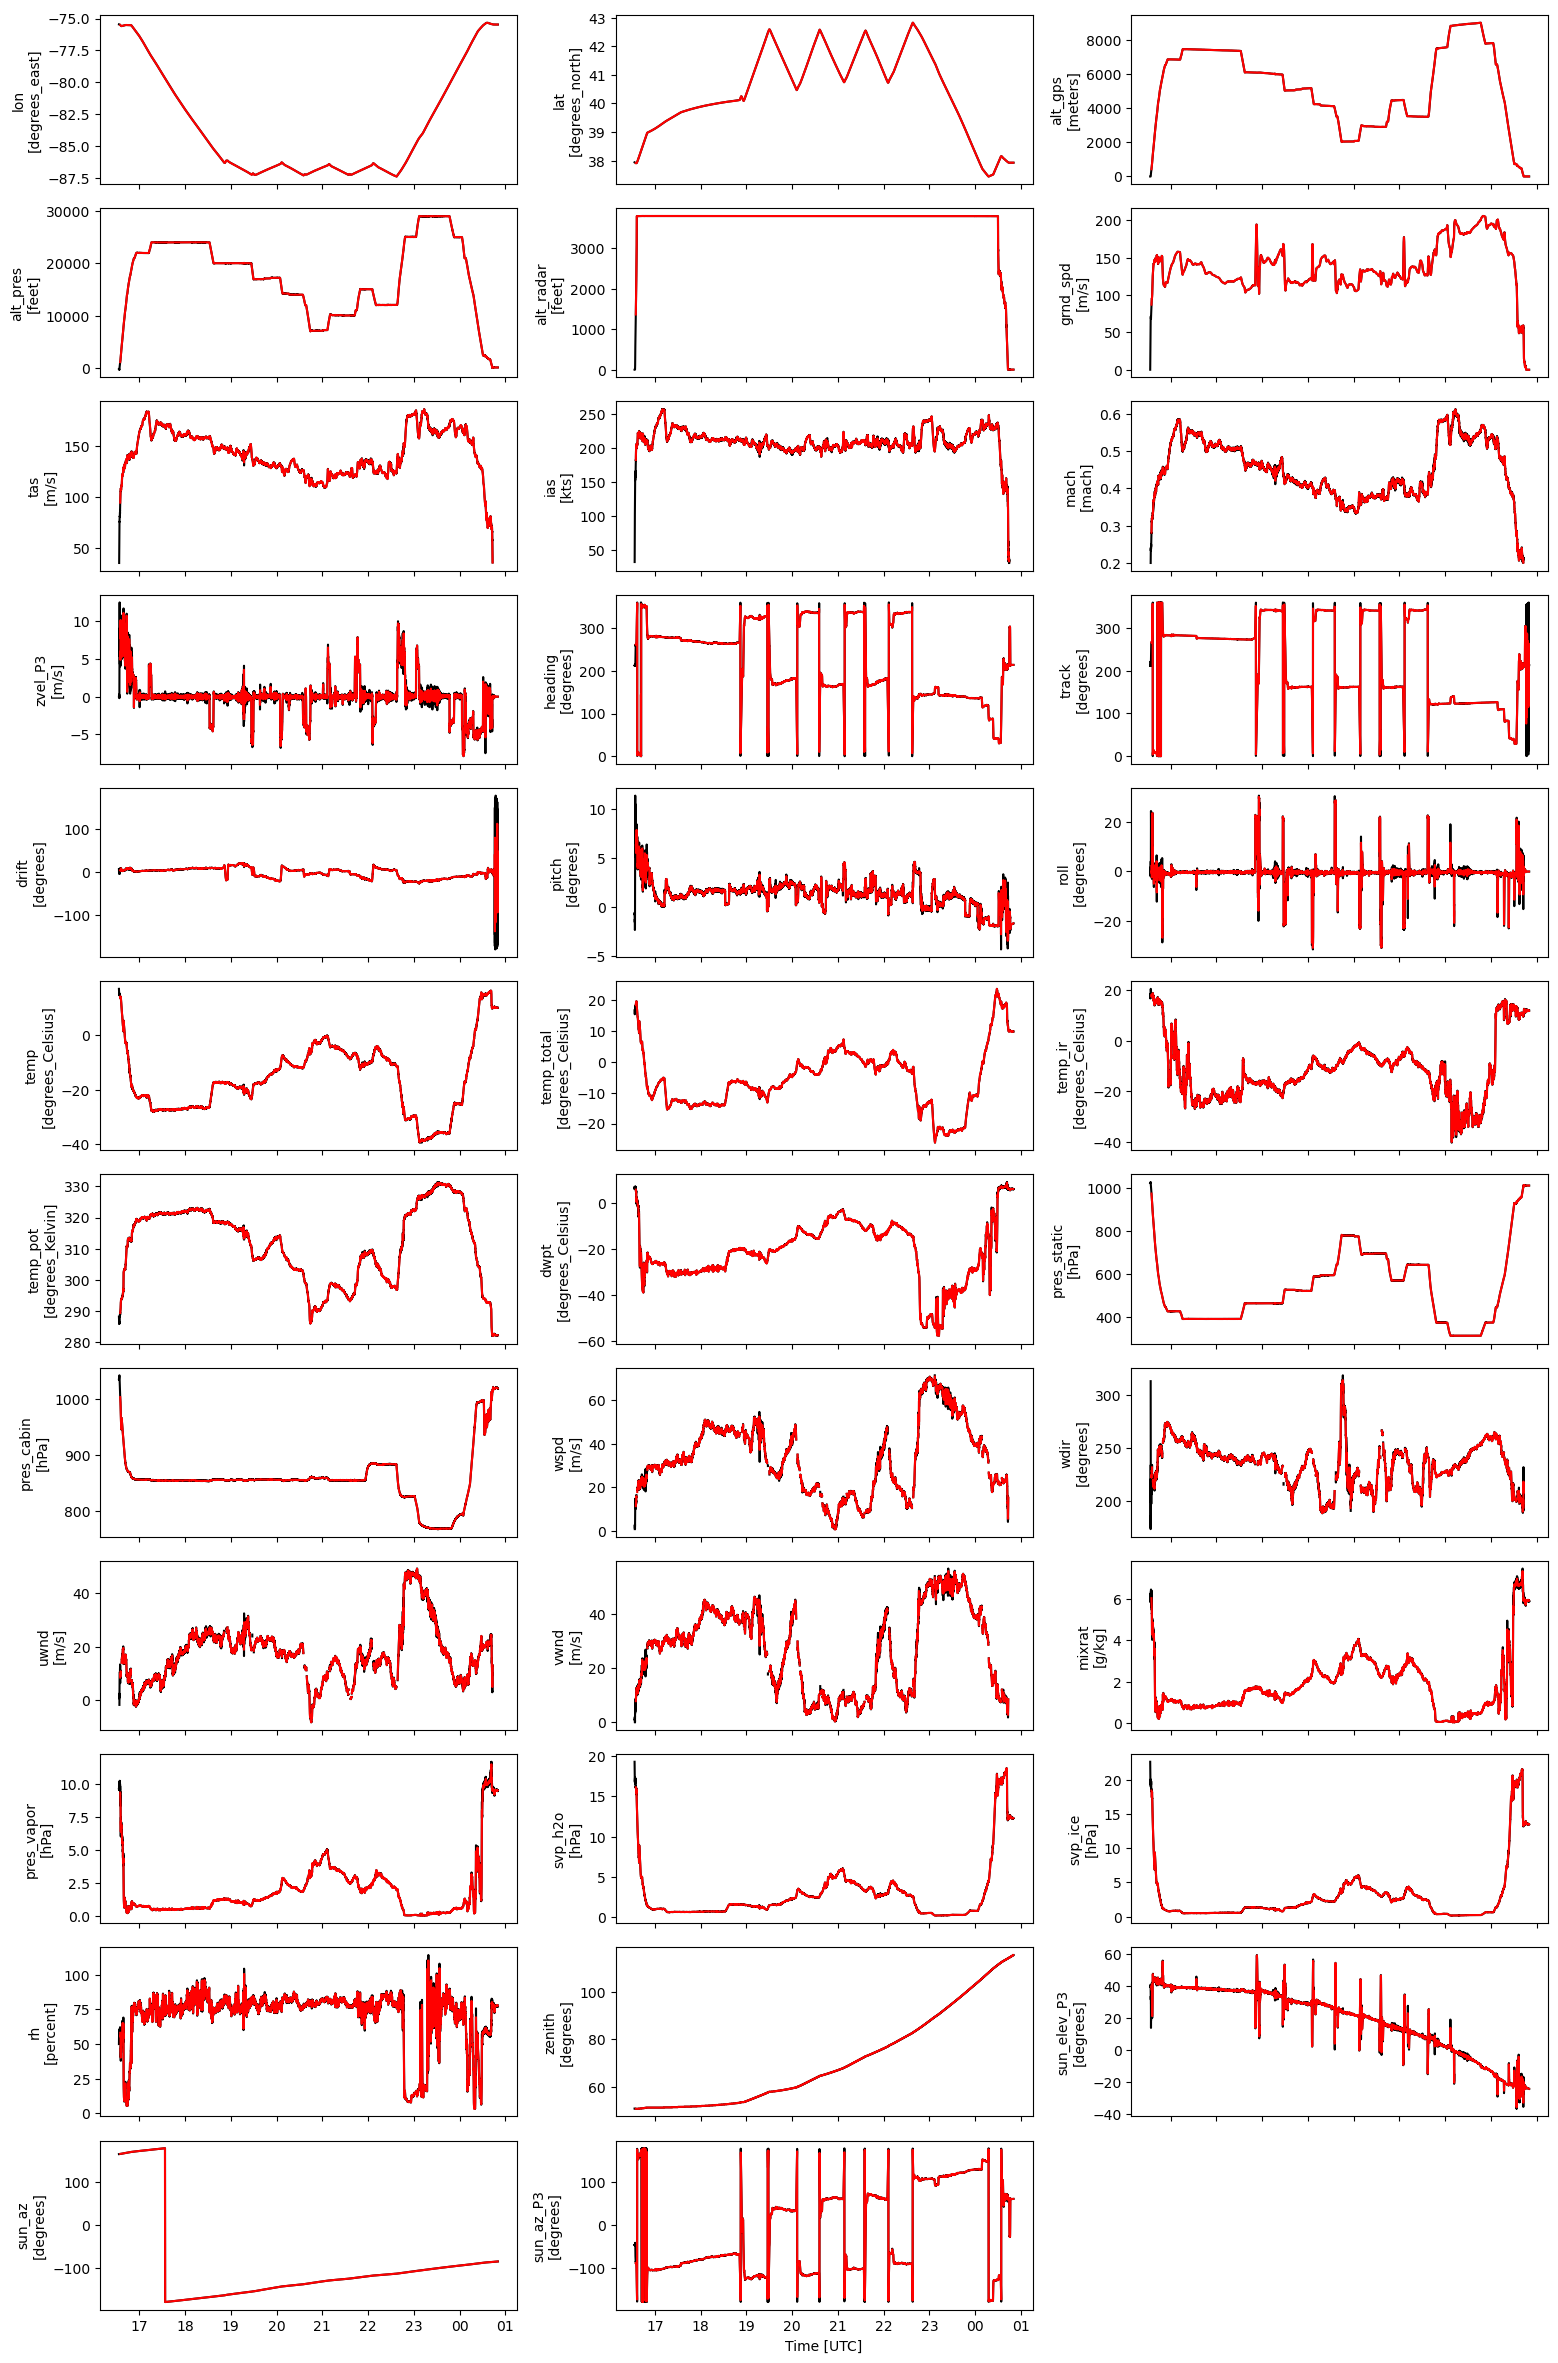

In [4]:
fig, axs = plt.subplots(nrows=12, ncols=3, sharex=True, figsize=(16, 24))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for i, var in enumerate(list(p3nav.data.data_vars)):
    ax = axs[i // 3, int(np.mod(i, 3))]
    ax.plot(p3nav.data['time'], p3nav.data[var], 'k-')
    ax.plot(p3nav_avg.data['time'], p3nav_avg.data[var], 'r-')
    ax.set_ylabel(f'{var}\n[{p3nav.data[var].attrs["units"]}]')
axs[-1, -1].axis('off')

plt.xlim(p3nav_avg.data['time'][0], p3nav_avg.data['time'][-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xlabel('Time [UTC]')
plt.tight_layout()
plt.show()

---
## TAMMS Data

Load the TAMMS data and derive 5-s averages based on the P-3 Met-Nav object above.

In [5]:
file_tamms = (
    '/home/disk/bob/impacts/microphysics/20220217/'
    'IMPACTS_TAMMS_P3_20220217_R0.ict'
)
tamms = p3.Tamms(file_tamms, '2022-02-17', p3_object=p3nav_avg)
tamms.data

<xarray.Dataset>
Dimensions:       (time_raw: 593900, time: 5939)
Coordinates:
  * time_raw      (time_raw) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-1...
  * time          (time) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00...
Data variables: (12/25)
    lon_raw       (time_raw) float64 -75.47 -75.47 -75.47 -75.47 ... nan nan nan
    lat_raw       (time_raw) float64 37.98 37.98 37.98 37.98 ... nan nan nan nan
    alt_gps_raw   (time_raw) float64 426.1 426.1 426.1 426.1 ... nan nan nan nan
    alt_pres_raw  (time_raw) float64 1.026e+03 1.03e+03 1.031e+03 ... nan nan
    pitch_raw     (time_raw) float64 6.51 6.5 6.48 6.47 6.45 ... nan nan nan nan
    roll_raw      (time_raw) float64 -0.0 0.07 0.19 0.33 ... nan nan nan nan
    ...            ...
    wspd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    wdir          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    uwnd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    vwnd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    wwnd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    wwnd_std      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    Experiment:           IMPACTS
    Platform:             P-3
    Mission PI:           Lynn McMurdie (lynnm@uw.edu)
    INSTRUMENT_INFO_2:    ***************************************************...
    INSTRUMENT_INFO_3:    ASA Langley Fast Response Wind and Temperature Data...
    INSTRUMENT_INFO_4:    
    ...                   ...
    PROJECT_INFO:         IMPACTS 2022
    STIPULATIONS_ON_USE:  This is FINAL data, please consult PI with question...
    OTHER_COMMENTS:       Filtered conservatively, please email PI with any q...
    REVISION:             R0
    R0:                   FINAL DATA; all calibrations, time lags, and analys...
    INSTRUMENT_INFO_5:    ***************************************************...

Compare the 20 Hz and 5-s averaged data for all vars.

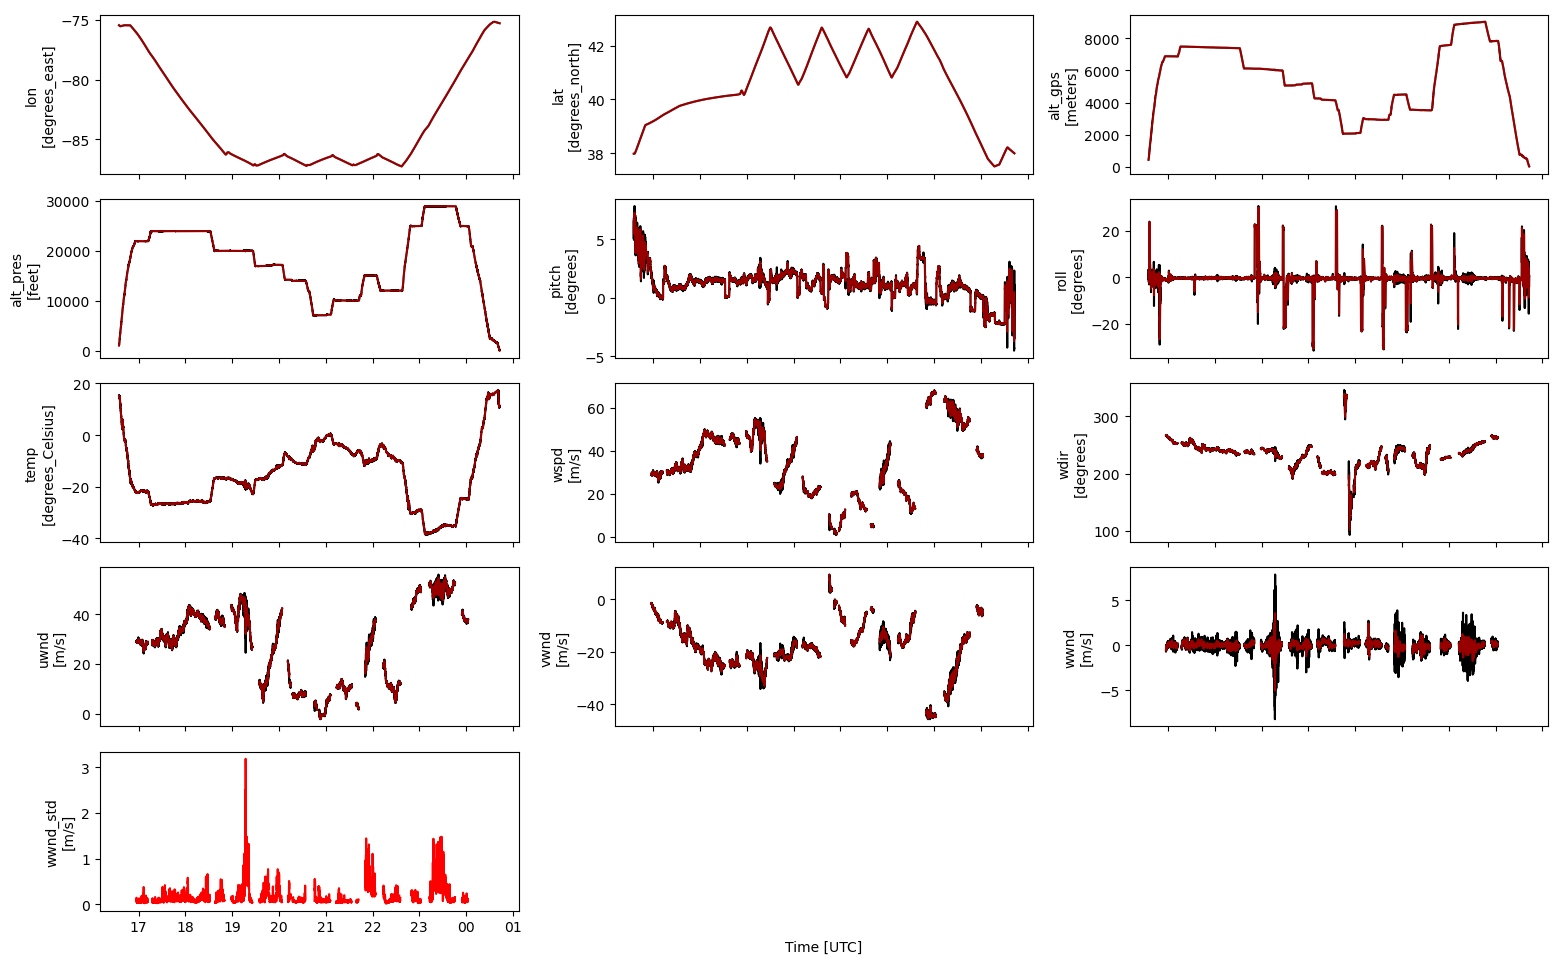

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=3, sharex=True, figsize=(16, 10))
fig.add_subplot(111, frameon=False)
plt.tick_params(
    labelcolor='none', which='both', top=False, bottom=False,
    left=False, right=False
)

for i, var in enumerate(list(tamms.data.data_vars)[:12]):
    ax = axs[i // 3, int(np.mod(i, 3))]
    ax.plot(tamms.data['time_raw'], tamms.data[var], 'k-')
    ax.plot(
        tamms.data['time'], tamms.data[var.split('_raw')[0]], 'r-', alpha=0.6
    )
    ax.set_ylabel(
        f'{var.split("_raw")[0]}\n[{tamms.data[var].attrs["units"]}]'
    )
# for vertical vel stdev.
ax = axs[(i + 1) // 3, int(np.mod(i + 1, 3))]
ax.plot(tamms.data['time'], tamms.data['wwnd_std'], 'r-')
ax.set_ylabel(
    f'{"wwnd_std"}\n[{tamms.data["wwnd_std"].attrs["units"]}]'
)

axs[-1, -2].axis('off')
axs[-1, -1].axis('off')

plt.xlim(tamms.data['time'][0], tamms.data['time'][-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xlabel('Time [UTC]')
plt.tight_layout()
plt.show()

---
## PSD Data (UIOOPS Algorithm)

Load the UIOOPS 2D-S and HVPS PSDs, average over 5-s intervals, and compute bulk properties for a 30-min period.

In [7]:
filename_2ds = (
    '/home/disk/bob/impacts/microphysics/20220217/sd_data/'
    'sd_v1.20220217.3VCPI.V.nc'
)
filename_hvps = (
    '/home/disk/bob/impacts/microphysics/20220217/sd_data/'
    'sd_v1.20220217.HVPS.V.nc'
)
date = '2022-02-17'
start_time = np.datetime64(f'{date}T21:30:00')
end_time = np.datetime64(f'{date}T22:00:00')
psd = p3.Psd(
    filename_2ds, filename_hvps, date,
    start_time=start_time, end_time=end_time, tres='5S',
    calc_bulk=True, calc_gamma_params=True)
psd.data

Computing gamma fit parameters will take some time.


<xarray.Dataset>
Dimensions:               (size: 38, time: 360, habit: 8)
Coordinates:
    bin_center            (size) float64 0.1 0.125 0.15 0.2 ... 18.0 20.0 25.0
    bin_left              (size) float64 0.1 0.125 0.15 0.2 ... 18.0 20.0 25.0
    bin_right             (size) float64 0.125 0.15 0.2 0.25 ... 20.0 25.0 30.0
    bin_width             (size) float64 0.0025 0.0025 0.005 ... 0.2 0.5 0.5
  * habit                 (habit) <U9 'Tiny' 'Spherical' ... 'Aggregate'
  * time                  (time) datetime64[ns] 2022-02-17T21:30:00 ... 2022-...
Dimensions without coordinates: size
Data variables: (12/30)
    count                 (size, time) float64 93.0 84.0 84.0 ... 0.0 0.0 0.0
    count_habit           (habit, size, time) float64 1.0 3.0 2.0 ... 0.0 0.0
    sv                    (size, time) float64 3.99e+04 3.988e+04 ... 2.093e+06
    ND                    (size, time) float64 0.9324 0.8425 0.8432 ... nan nan
    ND_habit              (habit, size, time) float64 nan nan ... nan nan
    area_ratio            (size, time) float64 0.7286 0.7323 0.731 ... nan nan
    ...                    ...
    area_ratio_mean_n     (time) float64 0.5101 0.5006 0.5075 ... 0.4953 0.482
    area_ratio_mean_bf    (time) float64 0.4294 0.3949 0.455 ... 0.3728 0.3237
    area_ratio_mean_hy    (time) float64 0.4286 0.3932 0.4536 ... 0.3727 0.3267
    aspect_ratio_mean_n   (time) float64 0.6793 0.6737 0.6842 ... 0.713 0.6902
    aspect_ratio_mean_bf  (time) float64 0.6134 0.5678 0.6505 ... 0.6061 0.5092
    aspect_ratio_mean_hy  (time) float64 0.6161 0.5683 0.6523 ... 0.6116 0.5194
Attributes:
    Experiment:     IMPACTS
    Date:           2022-02-17
    Aircraft:       P-3
    Data Contact:   Joseph Finlon (jfinlon@uw.edu)
    Instrument PI:  David Delene (david.delene@und.edu)
    Mission PI:     Lynn McMurdie (lynnm@uw.edu)
    L3A Software:   UIOOPS_v3.4
    L3A Revision:   v1

Compare most bulk properties using two different mass-dimension relationships.

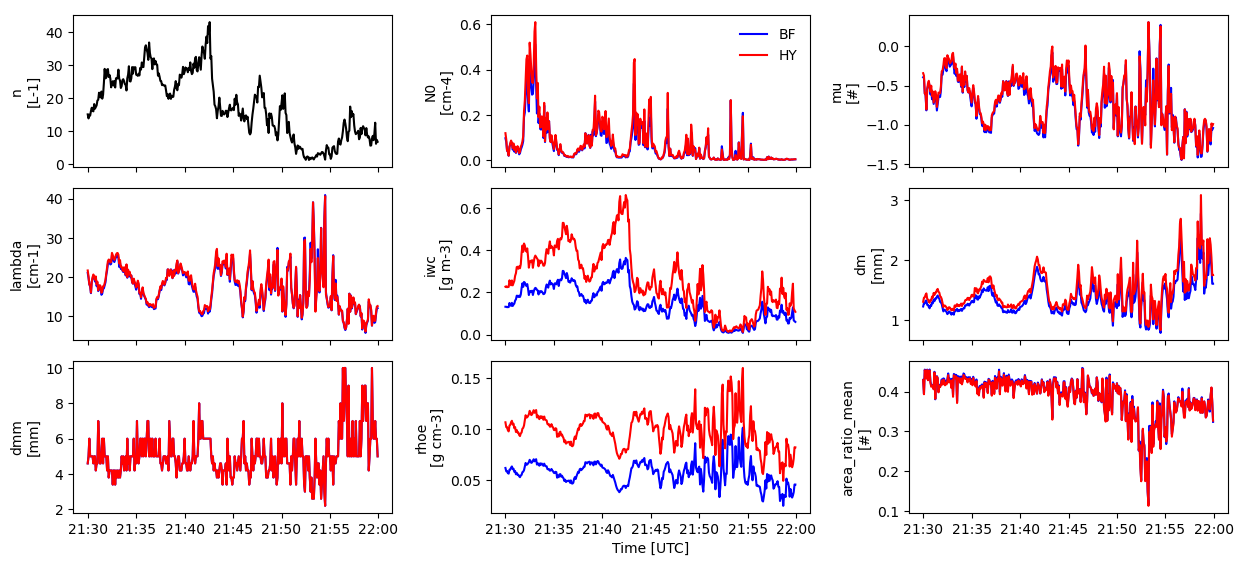

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(13, 6))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for i, var in enumerate(['n', 'N0', 'mu', 'lambda', 'iwc', 'dm', 'dmm', 'rhoe', 'area_ratio_mean']):
    ax = axs[i // 3, int(np.mod(i, 3))]
    if var == 'n':
        ax.plot(psd.data['time'], psd.data[var], 'k-')
        ax.set_ylabel(f'{var}\n[{psd.data[var].attrs["units"]}]')
    else:
        ax.plot(psd.data['time'], psd.data[f'{var}_bf'], 'b-', label='BF')
        ax.plot(psd.data['time'], psd.data[f'{var}_hy'], 'r-', label='HY')
        ax.set_ylabel(f'{var}\n[{psd.data[var + "_bf"].attrs["units"]}]')
axs[0, 1].legend(loc='upper right', frameon=False)

plt.xlim(psd.data['time'][0], psd.data['time'][-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xlabel('Time [UTC]')
plt.tight_layout()
plt.show()